In [5]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [6]:
# Read Data
ap_df = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Analisis Predictivo/HW01/aapl.csv",sep=';', decimal=",")
# ap_df['Fecha'] = pd.to_datetime(ap_df['fecha'],format="%m/%d/%Y")
# ap_df = ap_df.set_index('Trimeste')
# del ap_df['fecha']

ap_df = ap_df.set_index(pd.PeriodIndex(ap_df['Trimeste'].str[-4:] + ap_df['Trimeste'].str[:2], freq='Q-SEP')
                .to_timestamp(how='e'))




print(ap_df.head(10))
ap_df.shape

                              Trimeste       fecha  Ingresos
Trimeste                                                    
1989-12-31 23:59:59.999999999  Q1 1990  12/29/1989    1493.4
1990-03-31 23:59:59.999999999  Q2 1990  03/30/1990    1346.2
1990-06-30 23:59:59.999999999  Q3 1990  06/29/1990    1364.8
1990-09-30 23:59:59.999999999  Q4 1990  09/28/1990    1354.1
1990-12-31 23:59:59.999999999  Q1 1991  12/28/1990    1675.5
1991-03-31 23:59:59.999999999  Q2 1991  03/29/1991    1597.7
1991-06-30 23:59:59.999999999  Q3 1991  06/28/1991    1528.6
1991-09-30 23:59:59.999999999  Q4 1991  09/27/1991    1507.1
1991-12-31 23:59:59.999999999  Q1 1992  12/27/1991    1862.6
1992-03-31 23:59:59.999999999  Q2 1992  03/27/1992    1716.0


(127, 3)

In [7]:
ap_ts=ap_df[["Ingresos"]].resample("q").last()
ap_ts.drop(ap_ts.tail(1).index,inplace=True) 
print(ap_ts.head(10))
ap_ts.shape

            Ingresos
Trimeste            
1989-12-31    1493.4
1990-03-31    1346.2
1990-06-30    1364.8
1990-09-30    1354.1
1990-12-31    1675.5
1991-03-31    1597.7
1991-06-30    1528.6
1991-09-30    1507.1
1991-12-31    1862.6
1992-03-31    1716.0


(127, 1)

In [8]:
ap_ts[ap_ts['Ingresos'].isna()]

,Ingresos
Trimeste,
2005-09-30,NaN


In [9]:
ap_ts["2005":'2005']

,Ingresos
Trimeste,
2005-03-31,3243.0
2005-06-30,3520.0
2005-09-30,NaN
2005-12-31,5749.0


In [10]:
ap_ts.loc["2005-08-30":'2005-12-31','Ingresos'] = ap_ts["2005-12-31":'2005-12-31']["Ingresos"][0]/2

In [11]:
ap_ts["2005":'2005']

,Ingresos
Trimeste,
2005-03-31,3243.0
2005-06-30,3520.0
2005-09-30,2874.5
2005-12-31,2874.5


In [12]:
ap_ts_q=ap_ts['Ingresos'].astype('float64').to_period('Q-SEP').sort_index()
ap_ts_q.head()

Trimeste
1990Q1    1493.4
1990Q2    1346.2
1990Q3    1364.8
1990Q4    1354.1
1991Q1    1675.5
Freq: Q-SEP, Name: Ingresos, dtype: float64

### 1. ¿Los ingresos de Apple son estacionarios? ¿En media? ¿En varianza?

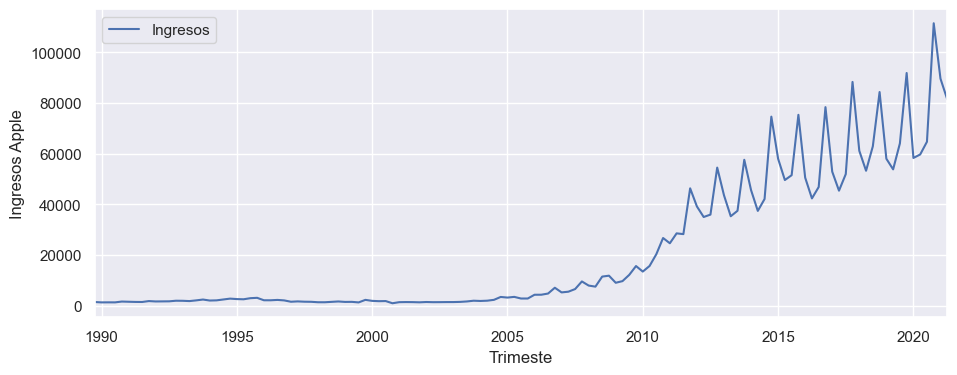

In [13]:
sns.set(rc={'figure.figsize':(11, 4)})
ax = ap_ts.plot(marker='', linestyle='-')
ax.set_ylabel('Ingresos Apple');

Claramente se puede obsevar que ni la media ni la varianza de los ingresos son constantes en el tiempo (ambos tienen una tendencia creciente) por lo que esta variable no es estacionaria.

### 2. ¿Cuál es su tendencia? ¿y su componente estacional?

Text(0.5, 1.0, 'Comportamiento Estacional')

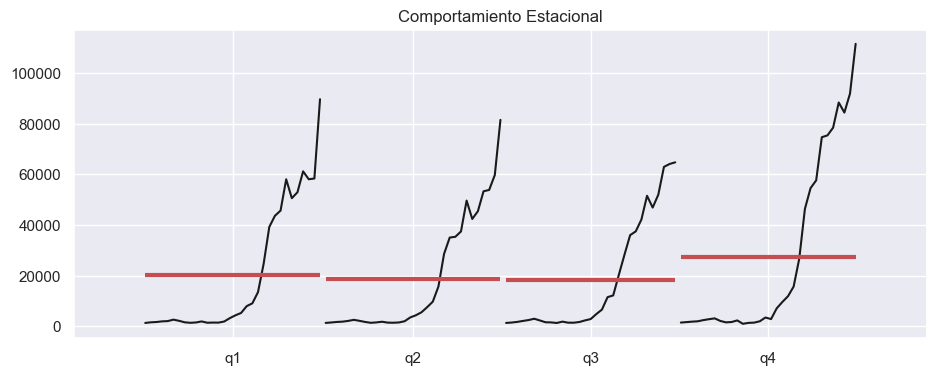

In [14]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(ap_ts['Ingresos'],ax=ax)
ax.set_title('Comportamiento Estacional')

Claramente mas ventas en el ultimo trimestre que es justo cuando sacan los nuevos modelos de iPhone (su mayor fuente de ingrasos) y justo a tiempo para poder comprarlos en Navidad como regalo

### 3. ¿Cuales son las ventas anuales de Apple?

/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_65839/4097507887.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ap_an = ap_df.resample("y").sum()


<AxesSubplot: xlabel='Trimeste'>

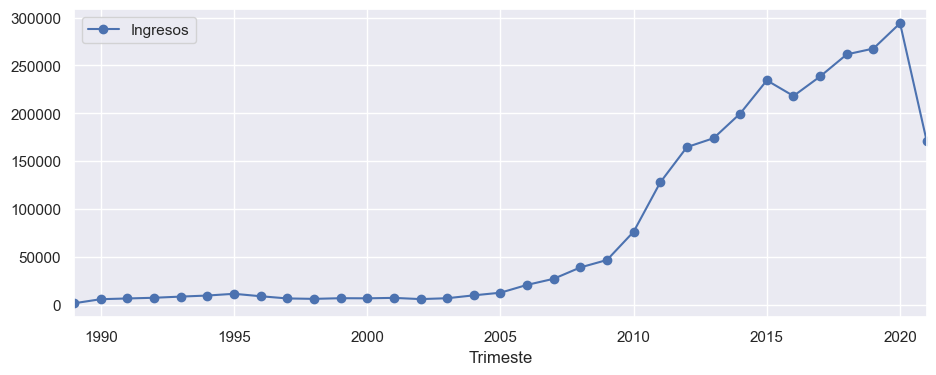

In [15]:
ap_an = ap_df.resample("y").sum()
ap_an.plot(marker = "o")

Claramente hay una tendencia creciente a lo largo de los años pero no es hasa la segunda mitad de los 2000 que hay un punto de inflexion en ventas debido a la expansion del iPod y la introduccion del iPhone que catapulta las ventas de cada año entre 2010 y 2020.

### 4. ¿Cuales son los crecimientos anuales de los ingresos?

CAGR is 18.58%


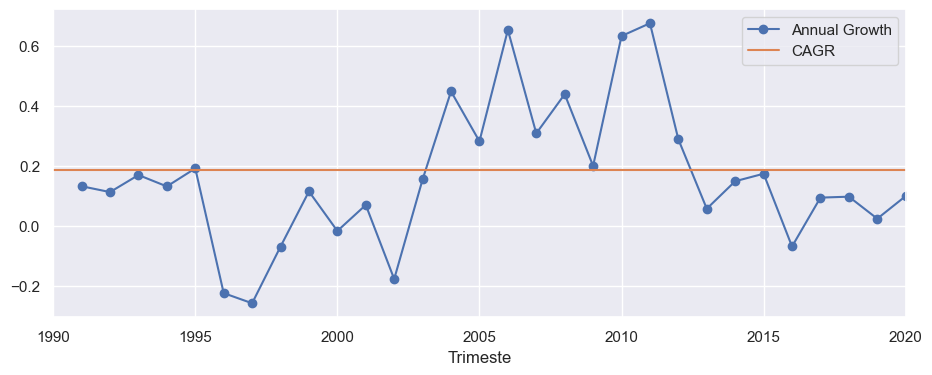

In [16]:
an_gr = ap_an['1990':'2020'].pct_change()
CAGR = (ap_an.loc["2020-12-31"]/ap_an.loc["1989-12-31"])**(1/(len(ap_an)-2))-1
an_gr["CAGR"] = CAGR[0]
print("CAGR is", str(round(CAGR[0]*100,2)) + "%")

# better control over ax
fig, ax = plt.subplots(1, 1)
an_gr["Ingresos"].plot(ax=ax, marker = "o", label = "Annual Growth")
an_gr["CAGR"].plot(ax=ax, label = "CAGR")
ax.legend(loc="upper right")
# ts_fm.plot(ax=ax)

### 5. ¿Qué modelo predice mejor?

In [17]:
from sktime.transformations.series.boxcox import LogTransformer

In [18]:
# Apply Log Transformer

transformer = LogTransformer()
log_ap_ts= transformer.fit_transform(ap_ts_q)
log_ap_ts.tail()

Trimeste
2020Q3    10.996836
2020Q4    11.077486
2021Q1    11.621233
2021Q2    11.402932
2021Q3    11.307548
Freq: Q-SEP, dtype: float64

Text(0.5, 1.0, 'Ingresos Apple: Transformación LOG')

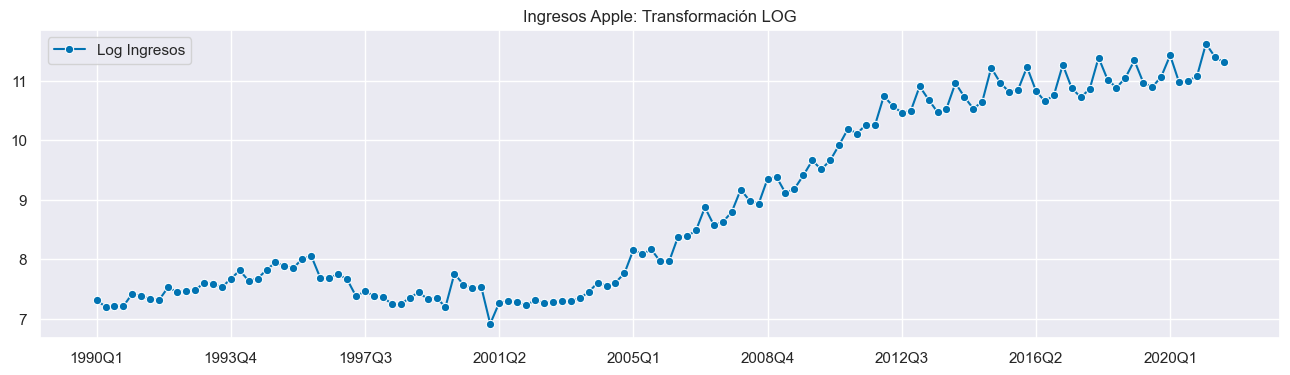

In [19]:
# Plot Log Data
from sktime.utils.plotting import plot_series
fig, ax =plot_series(log_ap_ts, labels=["Log Ingresos"])
ax.set_title('Ingresos Apple: Transformación LOG')

Text(0.5, 1.0, 'Ingresos Apple: Transformación LOG')

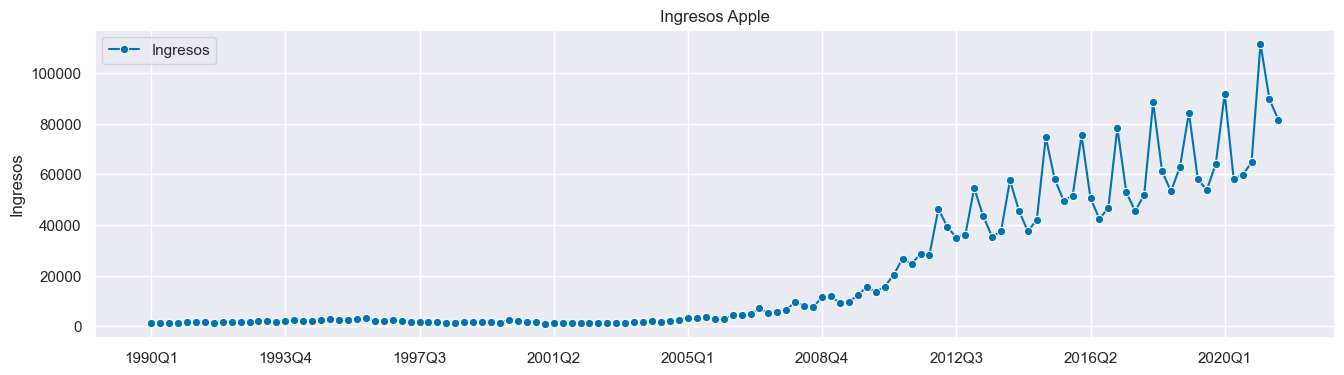

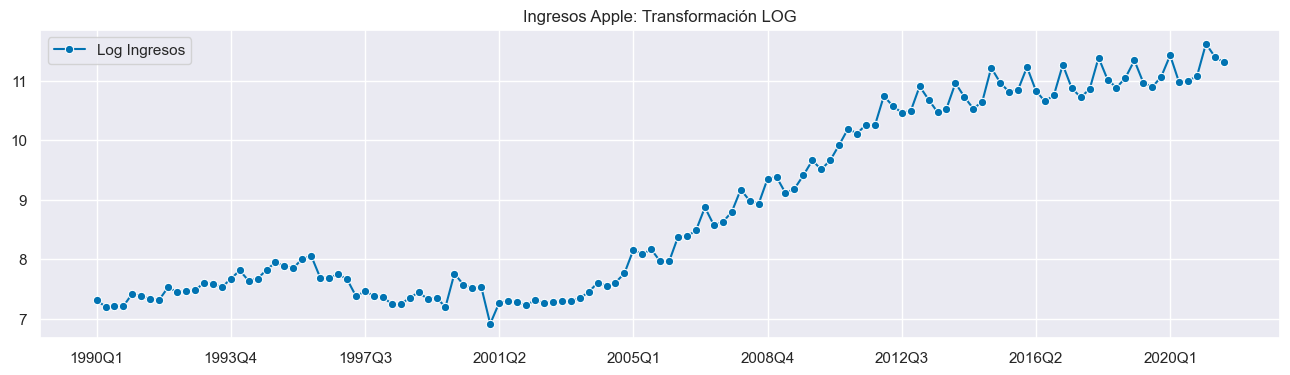

In [20]:
# Plot Log Data & Original Data
fig, ax =plot_series(ap_ts_q, labels=["Ingresos"])
ax.set_title('Ingresos Apple')
fig, ax =plot_series(log_ap_ts, labels=["Log Ingresos"])
ax.set_title('Ingresos Apple: Transformación LOG')

(<Figure size 1200x800 with 3 Axes>,
 array([<AxesSubplot: >,
        <AxesSubplot: title={'center': 'Autocorrelation'}>,
        <AxesSubplot: title={'center': 'Partial Autocorrelation'}>],
       dtype=object))

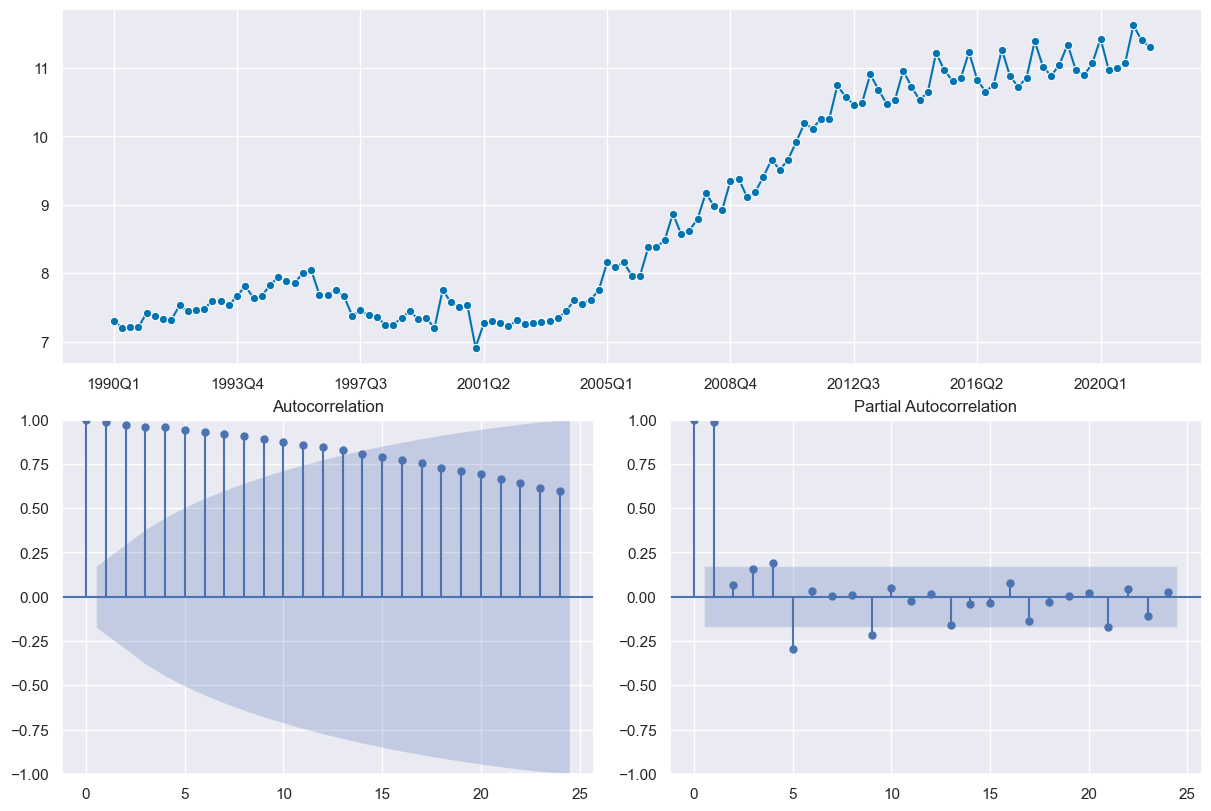

In [21]:
# Autocorrelation Fuction Package
from sktime.utils.plotting import plot_correlations

# Autocorrelation Fuction Original Time Series
plot_correlations(log_ap_ts)

In [22]:
# Difference Fuction Package
from sktime.transformations.series.difference import Differencer


(<Figure size 1200x800 with 3 Axes>,
 array([<AxesSubplot: >,
        <AxesSubplot: title={'center': 'Autocorrelation'}>,
        <AxesSubplot: title={'center': 'Partial Autocorrelation'}>],
       dtype=object))

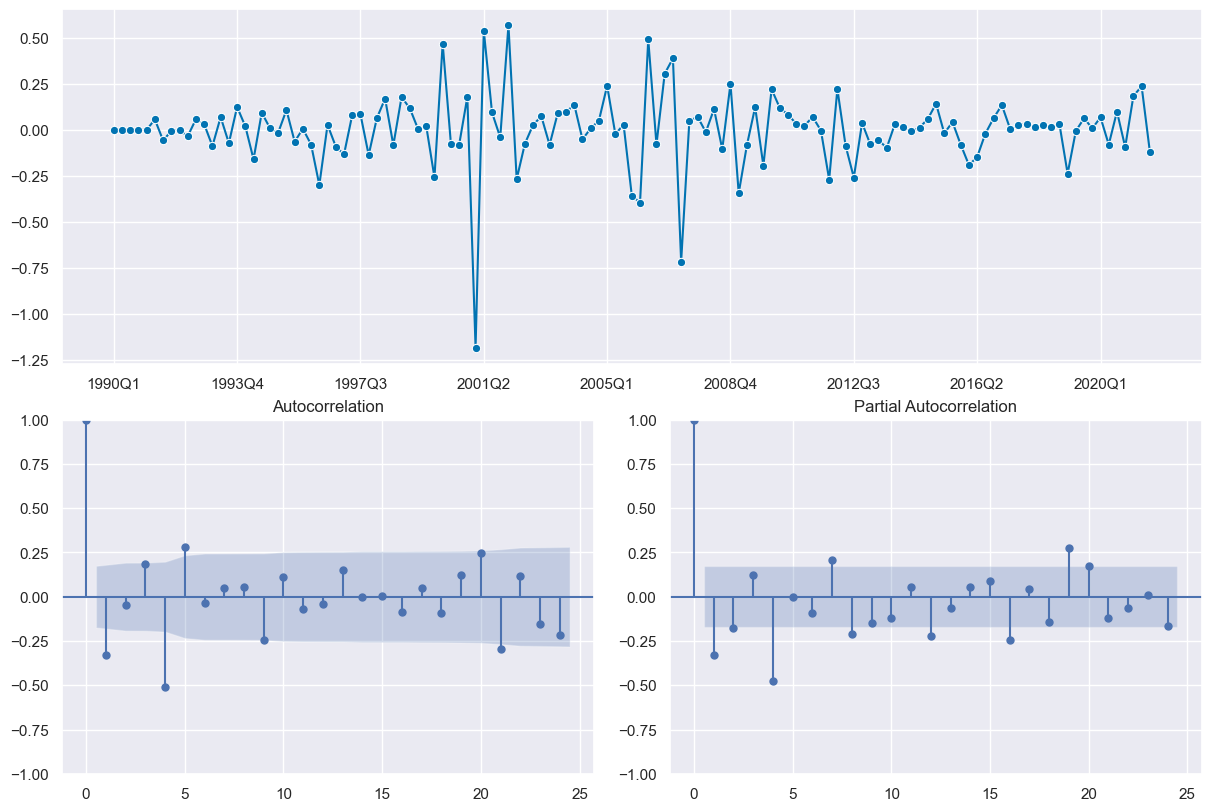

In [23]:
# Autocorrelation Fuction
# d=1; D=0; S=4
# 
transf_diff=Differencer(lags=[1,4])
plot_correlations(transf_diff.fit_transform(log_ap_ts))

In [24]:
# Sktime fucntions
# Forecast horizon and Split function 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

119 8


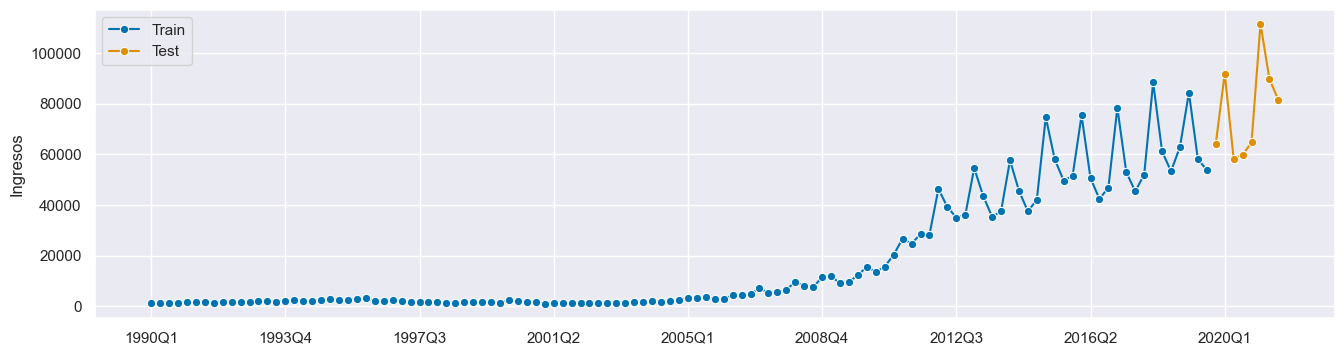

In [25]:
# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =ap_ts_q, test_size=8)
log_y_train, log_y_test = temporal_train_test_split(y =log_ap_ts, test_size=8)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [26]:
# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4, 5, 6, 7, 8])

In [28]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [29]:
#  Auto ARIMA Model
forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=4, suppress_warnings=True)

In [31]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  119
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 4)   Log Likelihood                  50.657
Date:                             Fri, 07 Oct 2022   AIC                            -89.314
Time:                                     19:34:44   BIC                            -72.690
Sample:                                 12-31-1989   HQIC                           -82.564
                                      - 06-30-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6825      0.280     -2.435      0.015      -1.232      -0.133
ma.L1          0.4011      

In [33]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

2019Q4    11.015496
2020Q1    11.354701
2020Q2    11.053189
2020Q3    10.947635
2020Q4    11.060465
2021Q1    11.383205
2021Q2    11.097166
2021Q3    10.999892
Freq: Q-SEP, dtype: float64

In [34]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

2019Q4    60809.206425
2020Q1    85365.855736
2020Q2    63144.981809
2020Q3    56819.504804
2020Q4    63606.120406
2021Q1    87834.088321
2021Q2    65983.893751
2021Q3    59867.701424
Freq: Q-SEP, dtype: float64

In [35]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [37]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

0.01235304847696583

In [38]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.18091444948284294

In [39]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

/Users/juan/opt/anaconda3/envs/AnPred/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


14422.614683923468

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

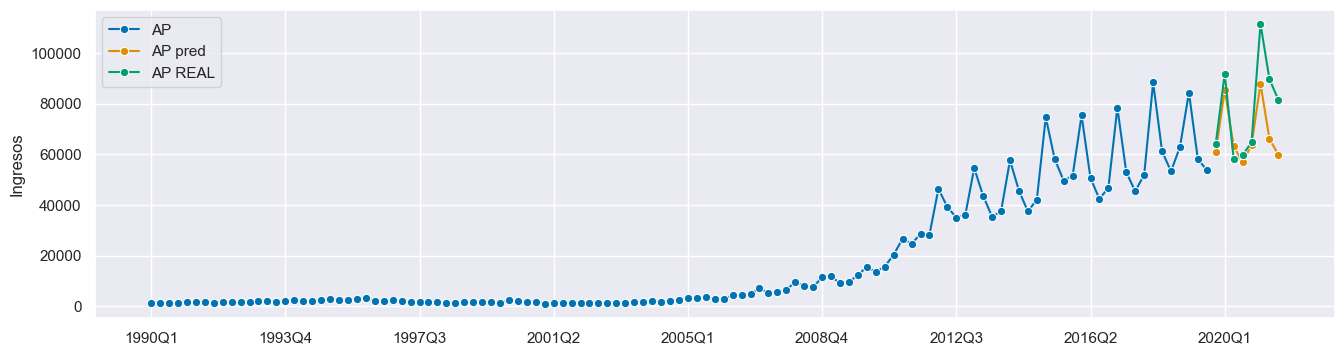

In [40]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["AP", "AP pred", "AP REAL"])

### 6. ¿Existe efecto COVID? Cuantificar.

### 7. ¿Cuales son las ventas acumuladas para el año 2021? ¿Y para el 2022? 


### 8. ¿Son creíbles las predicciones del Barclays?